In [1]:
# package used
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from normal_estimator import normal_Est


using device: CUDA


In [2]:
nest = normal_Est()
nest.parameter_init()
input_file_name = "dragon"
figure_path = "evaluate_figures_plot"
if not os.path.exists(figure_path):
    os.makedirs(figure_path)

## Compare the results between author's model and reproduced model

100%|██████████| 462/462 [00:20<00:00, 22.71it/s]


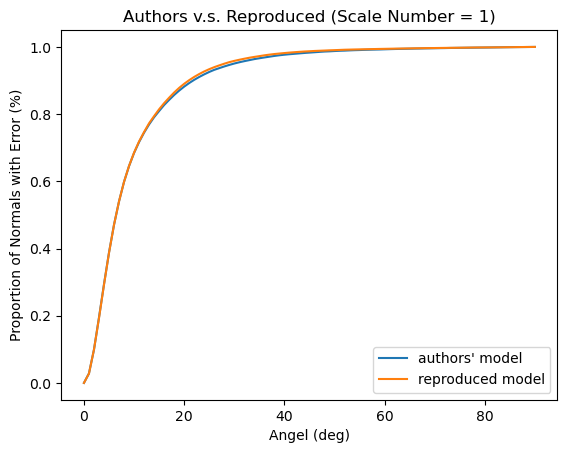

In [3]:
''' scale_number = 1 '''
# train model
nest.parameter_init()
nest.model_training()

# reproduced model
nest.est_normal(input_file_name)
_,angle, prob_s1_lenet = nest.evaluate(input_file_name)

# paper model
nest.use_paper_model = True
nest.est_normal(input_file_name)
_,angle, prob_s1_p = nest.evaluate(input_file_name)

# figure plot
plt.plot(angle, prob_s1_p, label = "authors' model")
plt.plot(angle, prob_s1_lenet, label = "reproduced model")
plt.legend()
plt.xlabel('Angel (deg)')
plt.ylabel('Proportion of Normals with Error (%)')
plt.title('Authors v.s. Reproduced (Scale Number = 1)')
plt.savefig(os.path.join(figure_path, 'rm_vs_pm_sn1.pdf'))
plt.show()

100%|██████████| 462/462 [00:49<00:00,  9.27it/s]


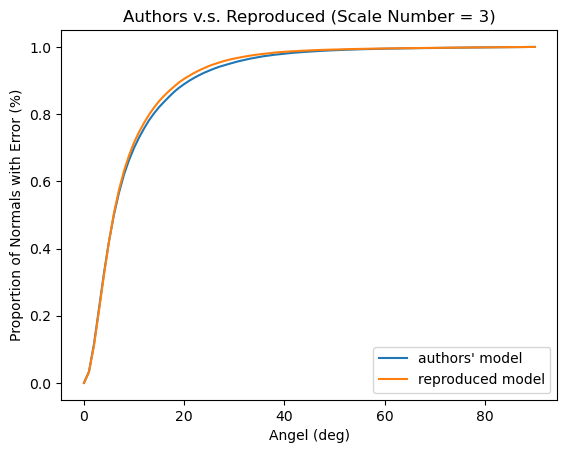

In [4]:
''' scale_number = 3 '''
# train model
nest.parameter_init()
nest.set_scale_number = 3
nest.model_training()

# reproduced model
nest.est_normal(input_file_name)
_,angle, prob_s3_lenet = nest.evaluate(input_file_name)

# paper model
nest.use_paper_model = True
nest.est_normal(input_file_name)
_,angle, prob_s3_p = nest.evaluate(input_file_name)

# figure plot
plt.plot(angle, prob_s3_p, label = "authors' model")
plt.plot(angle, prob_s3_lenet, label = "reproduced model")
plt.legend()
plt.xlabel('Angel (deg)')
plt.ylabel('Proportion of Normals with Error (%)')
plt.title('Authors v.s. Reproduced (Scale Number = 3)')
plt.savefig(os.path.join(figure_path, 'rm_vs_pm_sn3.pdf'))
plt.show()

100%|██████████| 462/462 [01:22<00:00,  5.57it/s]


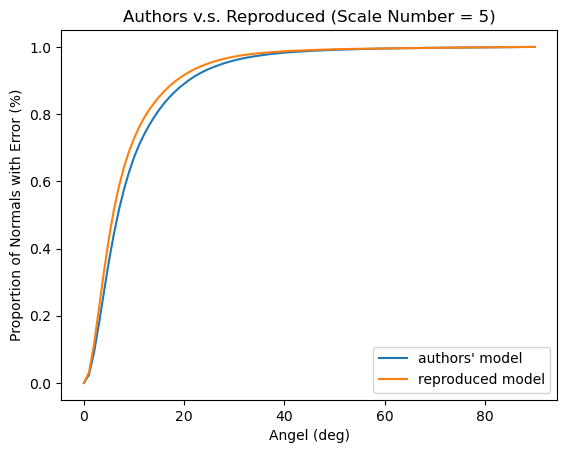

In [5]:
''' scale_number = 5 '''
# train model
nest.parameter_init()
nest.set_scale_number = 5
nest.model_training()

# reproduced model
nest.est_normal(input_file_name)
_,angle, prob_s5_lenet = nest.evaluate(input_file_name)

# paper model
nest.use_paper_model = True
nest.est_normal(input_file_name)
_,angle, prob_s5_p = nest.evaluate(input_file_name)

# figure plot
plt.plot(angle, prob_s5_p, label = "authors' model")
plt.plot(angle, prob_s5_lenet, label = "reproduced model")
plt.legend()
plt.xlabel('Angel (deg)')
plt.ylabel('Proportion of Normals with Error (%)')
plt.title('Authors v.s. Reproduced (Scale Number = 5)')
plt.savefig(os.path.join(figure_path, 'rm_vs_pm_sn5.pdf'))
plt.show()

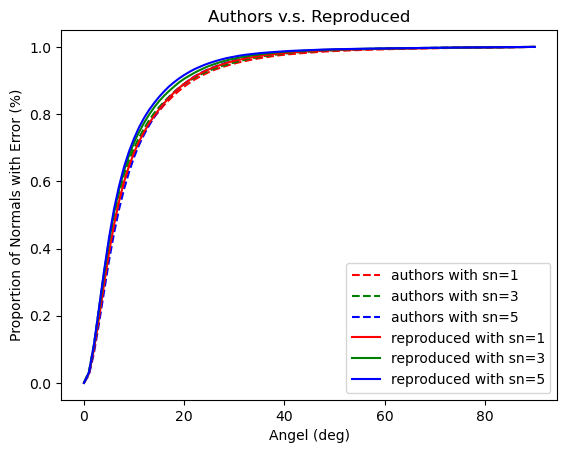

In [6]:
''' scale_number = 1, 3, 5 '''
# figure plot
plt.plot(angle, prob_s1_p, linestyle='--', color='r', label = "authors with sn=1")
plt.plot(angle, prob_s3_p, linestyle='--', color='g', label = "authors with sn=3")
plt.plot(angle, prob_s5_p, linestyle='--', color='b', label = "authors with sn=5")
plt.plot(angle, prob_s1_lenet, color='r', label = "reproduced with sn=1")
plt.plot(angle, prob_s3_lenet, color='g', label = "reproduced with sn=3")
plt.plot(angle, prob_s5_lenet, color='b', label = "reproduced with sn=5")
plt.legend()
plt.xlabel('Angel (deg)')
plt.ylabel('Proportion of Normals with Error (%)')
plt.title('Authors v.s. Reproduced')
plt.savefig(os.path.join(figure_path, 'rm_vs_pm.pdf'))
plt.show()

## Evaluate the impact of Noise Level

In [ ]:
# noise scale set
NOISE = np.linspace(0, 2, 21)

# root mean square error set
RMS_p = []
RMS_r = []
# prob set of angle deviation less than 5 and 10 degree
PL5_p = []
PL10_p = []
PL5_r = []
PL10_r = []
for n in NOISE:
    # paper model
    nest.est_normal(input_file_name, noise_scale = n, scale_number = 1, use_paper_model = True)
    rms_p,angle_p,prob_p = nest.evaluate(input_file_name, noise_scale = n, scale_number = 1, use_paper_model = True)
    RMS_p.append(rms_p)
    PL5_p.append(prob_p[6])
    PL10_p.append(prob_p[11])
    # training model
    nest.est_normal(input_file_name, noise_scale = n, scale_number = 1)
    rms_r,angle_r,prob_r = nest.evaluate(input_file_name, noise_scale = n, scale_number = 1)
    RMS_r.append(rms_r)
    PL5_r.append(prob_r[6])
    PL10_r.append(prob_r[11])

# figure save path
figure_path = "evaluate_figures_plot"
if not os.path.exists(figure_path):
    os.makedirs(figure_path)
# plot figure 1
plt.plot(NOISE, RMS_p, label = "model in paper")
plt.plot(NOISE, RMS_r, label = "model reproduced")
plt.legend()
plt.ylabel('RMS (deg)')
plt.xlabel('Noise Scale (%)')
plt.title('RMS')
plt.savefig(os.path.join(figure_path, 'rnsv.pdf'))
plt.show()

# plot figure 2
plt.plot(NOISE, PL5_p, label = "model in paper")
plt.plot(NOISE, PL5_r, label = "model reproduced")
plt.legend()
plt.ylabel('Prob of angle deviation < 5 degree (%)')
plt.xlabel('Noise Scale (%)')
plt.title('5 degree deviation')
plt.ylim(0,1)
plt.savefig(os.path.join(figure_path, '5dd.pdf'))
plt.show()

# plot figure 3
plt.plot(NOISE, PL10_p, label = "model in paper")
plt.plot(NOISE, PL10_r, label = "model reproduced")
plt.legend()
plt.ylabel('Prob of angle deviation < 10 degree (%)')
plt.xlabel('Noise Scale (%)')
plt.ylim(0,1)
plt.title('10 degree deviation')
plt.savefig(os.path.join(figure_path, '10dd.pdf'))
plt.show()

# Evaluate the improvement method
## Compare the results between LeNet model and ResNet model

creating dataset


100%|█████████████████████████████████████████| 391/391 [01:01<00:00,  6.38it/s]


(1, 33, 33)
  saving
-->done
loading the model
Creating optimizer
Training


100%|███████████| 391/391 [00:42<00:00,  9.20it/s, Bloss=0.000159, loss=6.19e-5]


training finished


100%|██████████| 462/462 [00:32<00:00, 14.35it/s]


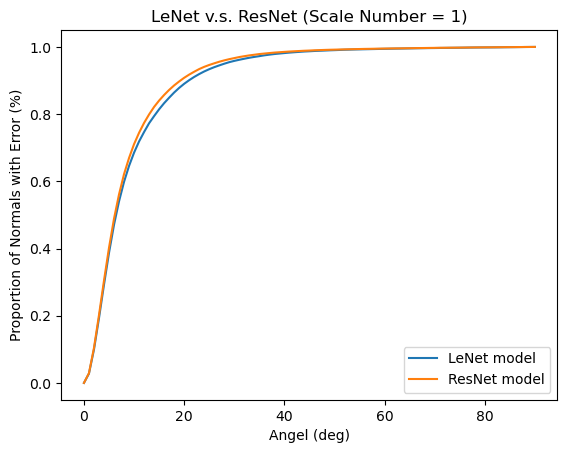

In [8]:
''' scale_number = 1 '''
# train model
nest.parameter_init()
nest.use_ResNet = True
nest.set_epoch_max = 10
nest.set_learning_rate = 0.01
nest.model_training()

# ResNet model
nest.est_normal(input_file_name)
_,angle, prob_s1_resnet = nest.evaluate(input_file_name)

# figure plot
plt.plot(angle, prob_s1_lenet, label = "LeNet model")
plt.plot(angle, prob_s1_resnet, label = "ResNet model")
plt.legend()
plt.xlabel('Angel (deg)')
plt.ylabel('Proportion of Normals with Error (%)')
plt.title('LeNet v.s. ResNet (Scale Number = 1)')
plt.savefig(os.path.join(figure_path, 'LeNet_vs_ResNet_sn1.pdf'))
plt.show()

creating dataset


100%|█████████████████████████████████████████| 391/391 [01:10<00:00,  5.54it/s]


(3, 33, 33)
  saving
-->done
loading the model
Creating optimizer
Training


100%|██████████████| 391/391 [00:43<00:00,  9.03it/s, Bloss=0.000108, loss=5e-5]


training finished


100%|██████████| 462/462 [01:04<00:00,  7.21it/s]


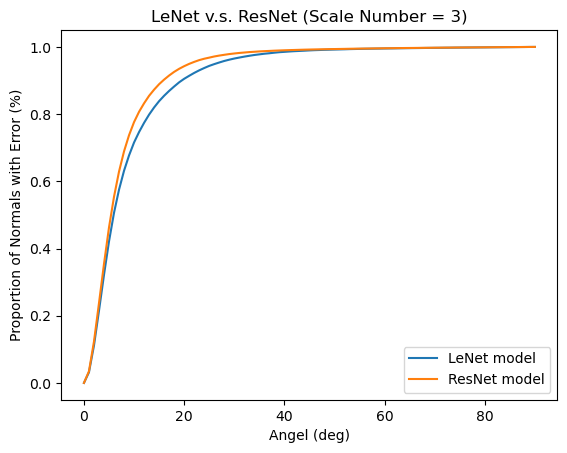

In [9]:
''' scale_number = 3 '''
# train model
nest.parameter_init()
nest.set_scale_number = 3
nest.use_ResNet = True
nest.set_epoch_max = 10
nest.set_learning_rate = 0.01
nest.model_training()

# ResNet model
nest.est_normal(input_file_name)
_,angle, prob_s3_resnet = nest.evaluate(input_file_name)

# figure plot
plt.plot(angle, prob_s3_lenet, label = "LeNet model")
plt.plot(angle, prob_s3_resnet, label = "ResNet model")
plt.legend()
plt.xlabel('Angel (deg)')
plt.ylabel('Proportion of Normals with Error (%)')
plt.title('LeNet v.s. ResNet (Scale Number = 3)')
plt.savefig(os.path.join(figure_path, 'LeNet_vs_ResNet_sn3.pdf'))
plt.show()

creating dataset


100%|█████████████████████████████████████████| 391/391 [01:21<00:00,  4.81it/s]


(5, 33, 33)
  saving
-->done
loading the model
Creating optimizer
Training


100%|████████████| 391/391 [00:41<00:00,  9.31it/s, Bloss=5.95e-5, loss=4.73e-5]


training finished


100%|██████████| 462/462 [01:35<00:00,  4.84it/s]


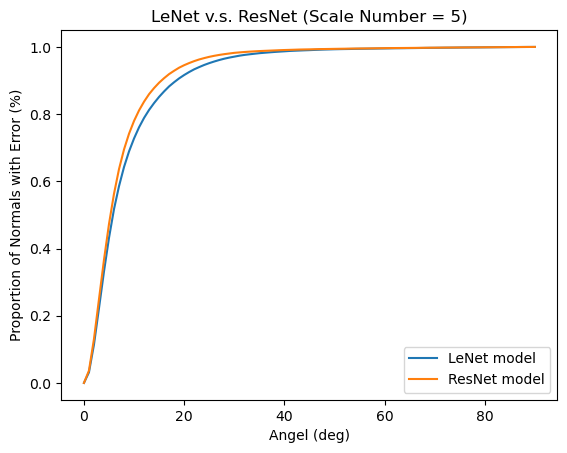

In [10]:
''' scale_number = 5 '''
# train model
nest.parameter_init()
nest.set_scale_number = 5
nest.set_epoch_max = 10
nest.set_learning_rate = 0.01
nest.use_ResNet = True
nest.model_training()

# ResNet model
nest.est_normal(input_file_name)
_,angle, prob_s5_resnet = nest.evaluate(input_file_name)

# figure plot
plt.plot(angle, prob_s5_lenet, label = "LeNet model")
plt.plot(angle, prob_s5_resnet, label = "ResNet model")
plt.legend()
plt.xlabel('Angel (deg)')
plt.ylabel('Proportion of Normals with Error (%)')
plt.title('LeNet v.s. ResNet (Scale Number = 5)')
plt.savefig(os.path.join(figure_path, 'LeNet_vs_ResNet_sn5.pdf'))
plt.show()

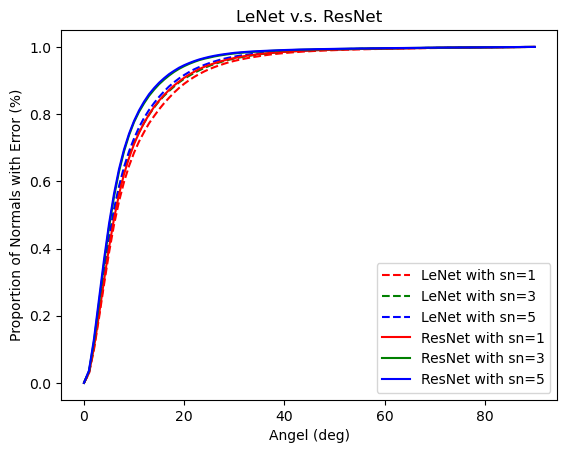

In [12]:
''' scale_number = 1, 3, 5 '''
# figure plot
plt.plot(angle, prob_s1_lenet, linestyle='--', color='r', label = "LeNet with sn=1")
plt.plot(angle, prob_s3_lenet, linestyle='--', color='g', label = "LeNet with sn=3")
plt.plot(angle, prob_s5_lenet, linestyle='--',color='b', label = "LeNet with sn=5")
plt.plot(angle, prob_s1_resnet, color='r', label = "ResNet with sn=1")
plt.plot(angle, prob_s3_resnet, color='g', label = "ResNet with sn=3")
plt.plot(angle, prob_s5_resnet, color='b', label = "ResNet with sn=5")
plt.legend()
plt.xlabel('Angel (deg)')
plt.ylabel('Proportion of Normals with Error (%)')
plt.title('LeNet v.s. ResNet')
plt.savefig(os.path.join(figure_path, 'LeNet_vs_ResNet.pdf'))
plt.show()

## Evaluate the impact of Noise Level

In [ ]:
nest = normal_Est()
'''
Test variation of noise scale
'''
input_file_name = "dragon"

'''
varying noise scale = 0, 1%, 2%, 3%, 4%, 5%, 6%, 7%, 8%, 9%, 10%. 
'''

# noise scale set
NOISE = np.linspace(0,0.1,11)
# root mean square error set
RMS_p = []
RMS_r = []
# prob set of angle deviation less than 5 and 10 degree
PL5_p = []
PL10_p = []
PL5_r = []
PL10_r = []
for n in NOISE:
    # paper model
    nest.est_normal(input_file_name, noise_scale = n, scale_number = 1, use_paper_model = True)
    rms_p,angle_p,prob_p = nest.evaluate(input_file_name, noise_scale = n, scale_number = 1, use_paper_model = True)
    RMS_p.append(rms_p)
    PL5_p.append(prob_p[6])
    PL10_p.append(prob_p[11])
    # training model
    nest.est_normal(input_file_name, noise_scale = n, scale_number = 1)
    rms_r,angle_r,prob_r = nest.evaluate(input_file_name, noise_scale = n, scale_number = 1)
    RMS_r.append(rms_r)
    PL5_r.append(prob_r[6])
    PL10_r.append(prob_r[11])

# figure save path
figure_path = "evaluate_figures_plot"
if not os.path.exists(figure_path):
    os.makedirs(figure_path)
# plot figure 1
plt.plot(NOISE, RMS_p, label = "model in paper")
plt.plot(NOISE, RMS_r, label = "model reproduced")
plt.legend()
plt.ylabel('RMS (deg)')
plt.xlabel('Noise Scale (%)')
plt.title('RMS')
plt.savefig(os.path.join(figure_path, 'rnsv.pdf'))
plt.show()

# plot figure 2
plt.plot(NOISE, PL5_p, label = "model in paper")
plt.plot(NOISE, PL5_r, label = "model reproduced")
plt.legend()
plt.ylabel('Prob of angle deviation < 5 degree (%)')
plt.xlabel('Noise Scale (%)')
plt.title('5 degree deviation')
plt.ylim(0,1)
plt.savefig(os.path.join(figure_path, '5dd.pdf'))
plt.show()

# plot figure 3
plt.plot(NOISE, PL10_p, label = "model in paper")
plt.plot(NOISE, PL10_r, label = "model reproduced")
plt.legend()
plt.ylabel('Prob of angle deviation < 10 degree (%)')
plt.xlabel('Noise Scale (%)')
plt.ylim(0,1)
plt.title('10 degree deviation')
plt.savefig(os.path.join(figure_path, '10dd.pdf'))
plt.show()